In [3]:
import bamboolib as bam
import pandas as pd
pd.set_option('display.float_format', '{:.4f}'.format)

In [4]:
import pandas as pd; import numpy as np
df = pd.read_excel(r'C:\Users\ParsArgham\Desktop\Univercity\Papers\#J A Variation-Aware Decision Support System for Tackling COVID-19 A Transfer Learning and MADM Approach\data.xlsx')
import pandas as pd; import numpy as np
# Step: Drop rows where variant is one of: B.1.427/B.1.429, B.1.525, B.1.621, C.37, SGTF, B.1.616, B.1.620, UNK, Other
df = df.loc[~(df['variant'].isin(['B.1.427/B.1.429', 'B.1.525', 'B.1.621', 'C.37', 'SGTF', 'B.1.616', 'B.1.620', 'UNK', 'Other']))]

# Step: Drop columns
df = df.drop(columns=['source', 'new_cases', 'number_sequenced', 'percent_cases_sequenced', 'valid_denominator', 'number_sequenced_known_variant', 'percent_variant'])

# Step: Group by and aggregate
#df = df.groupby(['country', 'variant']).agg(number_detections_variant_sum=('number_detections_variant', 'sum')).reset_index()

df

        country country_code year_week  variant  number_detections_variant
1       Austria           AT   2020-01  Omicron                          0
2       Austria           AT   2020-01  Omicron                          0
3       Austria           AT   2020-01     Beta                          0
4       Austria           AT   2020-01    Delta                          0
5       Austria           AT   2020-01  Omicron                          0
...         ...          ...       ...      ...                        ...
148252   Sweden           SE   2023-45  Omicron                         40
148253   Sweden           SE   2023-45  Omicron                        321
148254   Sweden           SE   2023-46  Omicron                          5
148256   Sweden           SE   2023-46  Omicron                         27
148257   Sweden           SE   2023-46  Omicron                        167

[109851 rows x 5 columns]

In [5]:
import pandas as pd; import numpy as np
df2 = pd.read_csv(r'C:\Users\ParsArgham\Desktop\Univercity\Papers\#J A Variation-Aware Decision Support System for Tackling COVID-19 A Transfer Learning and MADM Approach\owid-covid-data.csv', sep=',', decimal='.')
# Step: Drop columns
df2 = df2.drop(columns=['iso_code', 'continent', 'new_cases_smoothed', 'total_cases', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_smoothed_per_million', 'new_cases_per_million', 'new_deaths_per_million', 'total_deaths_per_million', 'new_deaths_smoothed_per_million', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_per_case', 'new_vaccinations_smoothed', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'new_people_vaccinated_smoothed', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed_per_hundred', 'total_boosters_per_hundred', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million'])

# Step: Change data type of date to Datetime
df2['date'] = pd.to_datetime(df2['date'], infer_datetime_format=True)
import pandas as pd

# Assuming 'your_datetime_column' is the name of your datetime column


# Assuming 'your_datetime_column' is the name of your datetime column
df2['year_week'] = df2['date'].dt.strftime('%Y-%U')


import pandas as pd; import numpy as np
# Step: Group by and aggregate
df2 = df2.groupby(['location', 'year_week']).agg(new_cases=('new_cases', 'sum'), new_tests=('new_tests', 'sum'), reproduction_rate=('reproduction_rate', 'mean'), icu_patients=('icu_patients', 'sum'), hosp_patients=('hosp_patients', 'sum'), weekly_icu_admissions=('weekly_icu_admissions', 'sum'), weekly_hosp_admissions=('weekly_hosp_admissions', 'sum'), positive_rate=('positive_rate', 'mean'), total_vaccinations=('total_vaccinations', 'max'), people_vaccinated=('people_vaccinated', 'max'), people_fully_vaccinated=('people_fully_vaccinated', 'max'), stringency_index=('stringency_index', 'mean'), excess_mortality=('excess_mortality', 'mean'), population=('population', 'mean'), human_development_index=('human_development_index', 'mean'), life_expectancy=('life_expectancy', 'mean'), handwashing_facilities=('handwashing_facilities', 'mean'), male_smokers=('male_smokers', 'mean'), female_smokers=('female_smokers', 'mean'), diabetes_prevalence=('diabetes_prevalence', 'mean'), cardiovasc_death_rate=('cardiovasc_death_rate', 'mean'), gdp_per_capita=('gdp_per_capita', 'mean'), extreme_poverty=('extreme_poverty', 'mean'), aged_65_older=('aged_65_older', 'mean'), aged_70_older=('aged_70_older', 'mean'), median_age=('median_age', 'mean'), population_density=('population_density', 'mean')).reset_index()

# Step: Keep rows where location is one of: Afghanistan, Algeria
df2 = df2.loc[df2['location'].isin(df['country'].unique())]

df2

      location year_week  new_cases  new_tests  reproduction_rate  \
3108   Austria   2020-00     7.0000     0.0000                NaN   
3109   Austria   2020-01 27818.0000     0.0000                NaN   
3110   Austria   2020-02     0.0000     0.0000                NaN   
3111   Austria   2020-03     0.0000     0.0000                NaN   
3112   Austria   2020-04     0.0000     0.0000                NaN   
...        ...       ...        ...        ...                ...   
48300   Sweden   2024-05     0.0000     0.0000                NaN   
48301   Sweden   2024-06     0.0000     0.0000                NaN   
48302   Sweden   2024-07   229.0000     0.0000                NaN   
48303   Sweden   2024-08     0.0000     0.0000                NaN   
48304   Sweden   2024-09     0.0000     0.0000                NaN   

       icu_patients  hosp_patients  weekly_icu_admissions  \
3108         0.0000         0.0000                 0.0000   
3109         0.0000         0.0000               

In [6]:
import pandas as pd; import numpy as np
# Step: Left Join with df2 where year_week=year_week, country=location
df3 = pd.merge(df, df2.drop(columns=[]), how='left', left_on=['year_week', 'country'], right_on=['year_week', 'location'])


In [7]:
df3 = df3.groupby(['country', 'variant']).agg(number_detections_variant=('new_cases', 'sum'), new_tests=('new_tests', 'sum'), reproduction_rate=('reproduction_rate', 'mean'), icu_patients=('icu_patients', 'sum'), hosp_patients=('hosp_patients', 'sum'), weekly_icu_admissions=('weekly_icu_admissions', 'sum'), weekly_hosp_admissions=('weekly_hosp_admissions', 'sum'), positive_rate=('positive_rate', 'mean'), total_vaccinations=('total_vaccinations', 'max'), people_vaccinated=('people_vaccinated', 'max'), people_fully_vaccinated=('people_fully_vaccinated', 'max'), stringency_index=('stringency_index', 'mean'), excess_mortality=('excess_mortality', 'mean'), population=('population', 'mean'), human_development_index=('human_development_index', 'mean'), life_expectancy=('life_expectancy', 'mean'), handwashing_facilities=('handwashing_facilities', 'mean'), male_smokers=('male_smokers', 'mean'), female_smokers=('female_smokers', 'mean'), diabetes_prevalence=('diabetes_prevalence', 'mean'), cardiovasc_death_rate=('cardiovasc_death_rate', 'mean'), gdp_per_capita=('gdp_per_capita', 'mean'), extreme_poverty=('extreme_poverty', 'mean'), aged_65_older=('aged_65_older', 'mean'), aged_70_older=('aged_70_older', 'mean'), median_age=('median_age', 'mean'), population_density=('population_density', 'mean')).reset_index()


In [8]:
import pandas as pd; import numpy as np
# Step: Drop columns
df_final = df3.drop(columns=['handwashing_facilities'])
df_final.replace(0, np.nan, inplace=True)

# Step: Replace missing values
df_final = df_final.fillna(df3.median())

df_final

     country  variant  number_detections_variant       new_tests  \
0    Austria    Alpha               8215360.0000  380601919.0000   
1    Austria     Beta               6319610.0000  234780934.0000   
2    Austria    Delta              11012097.0000  410989446.0000   
3    Austria    Gamma              12543741.0000  433752017.0000   
4    Austria  Omicron              88383937.0000 2360014606.0000   
..       ...      ...                        ...             ...   
145   Sweden    Alpha               3897004.0000   31547783.0000   
146   Sweden     Beta               3317118.0000   24954731.0000   
147   Sweden    Delta               4420049.0000   32027001.0000   
148   Sweden    Gamma               5991815.0000   42625752.0000   
149   Sweden  Omicron              36814696.0000  224497397.0000   

     reproduction_rate  icu_patients  hosp_patients  weekly_icu_admissions  \
0               1.0538   347907.0000   2098773.0000              1318.0000   
1               1.0572   25

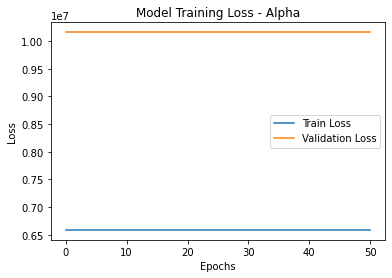

1/1 [==============================] - 0s 80ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

79/79 [==============================] - 0s 4ms/step


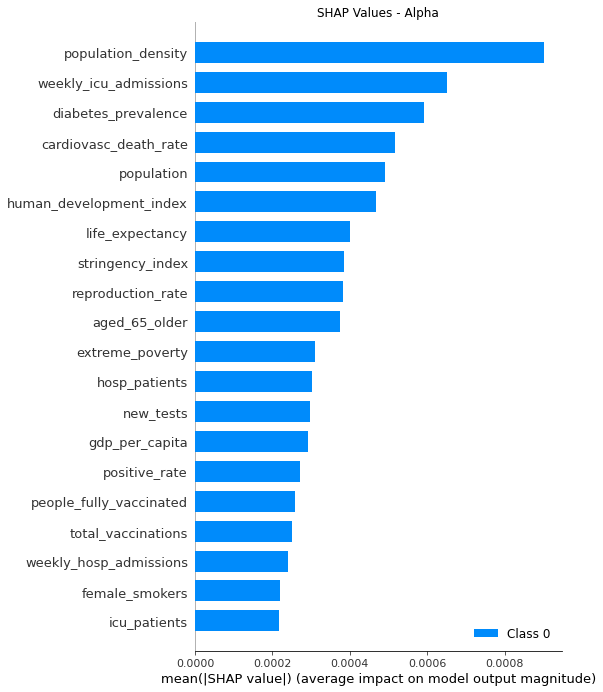

1/1 [==============================] - 0s 19ms/step


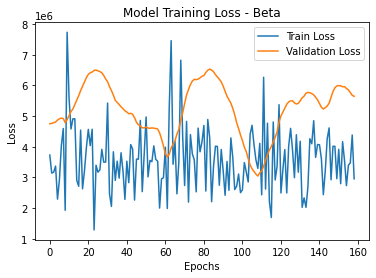

1/1 [==============================] - 0s 83ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

79/79 [==============================] - 0s 4ms/step


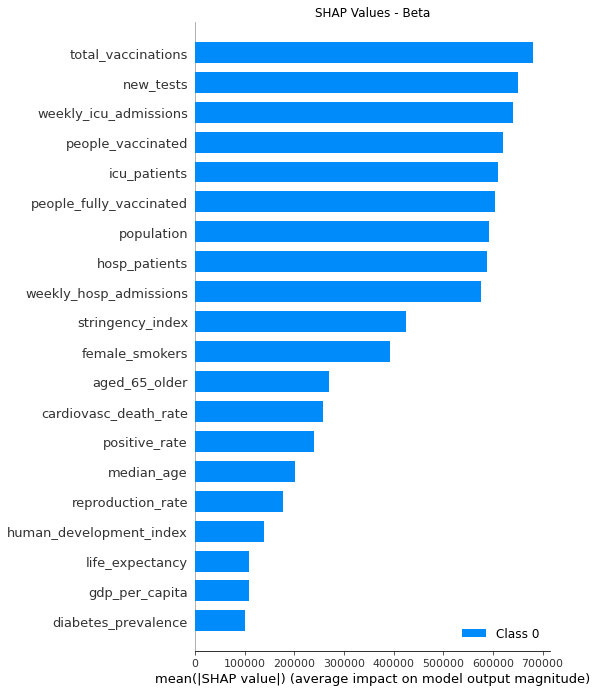

1/1 [==============================] - 0s 21ms/step


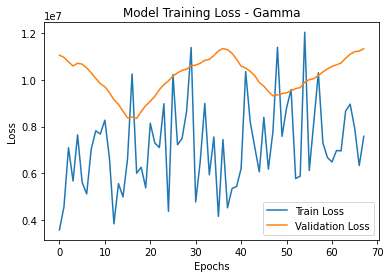

1/1 [==============================] - 0s 78ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

79/79 [==============================] - 0s 5ms/step


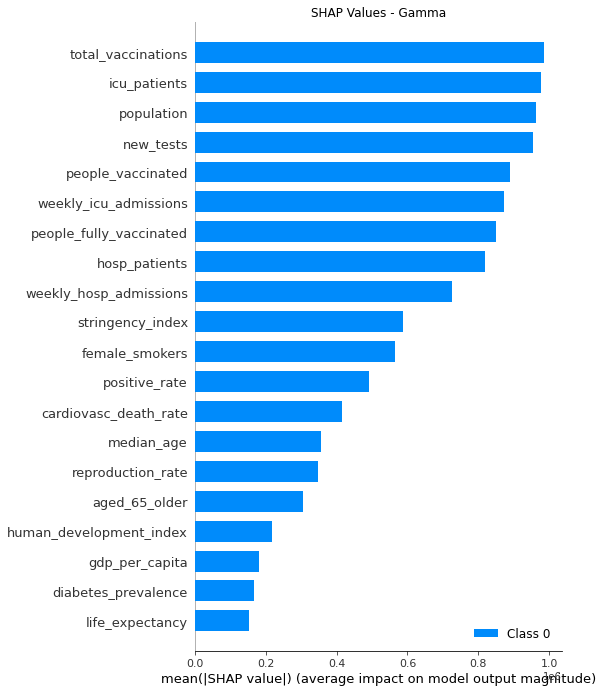

1/1 [==============================] - 0s 21ms/step


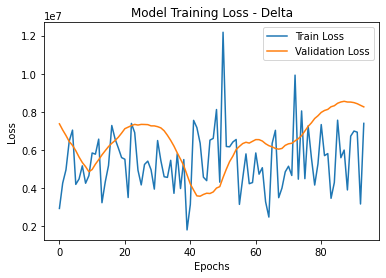

1/1 [==============================] - 0s 83ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

79/79 [==============================] - 0s 4ms/step


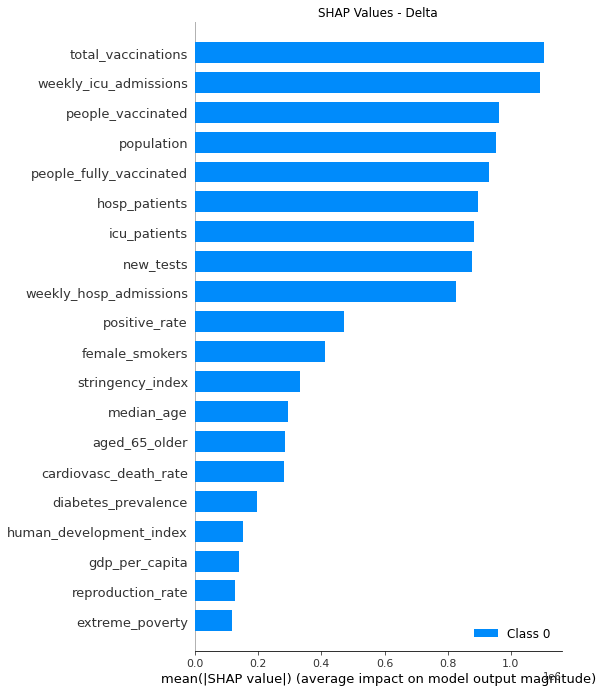

1/1 [==============================] - 0s 20ms/step


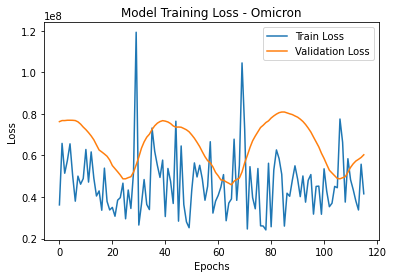

1/1 [==============================] - 0s 78ms/step


  0%|          | 0/25 [00:00<?, ?it/s]

79/79 [==============================] - 0s 4ms/step


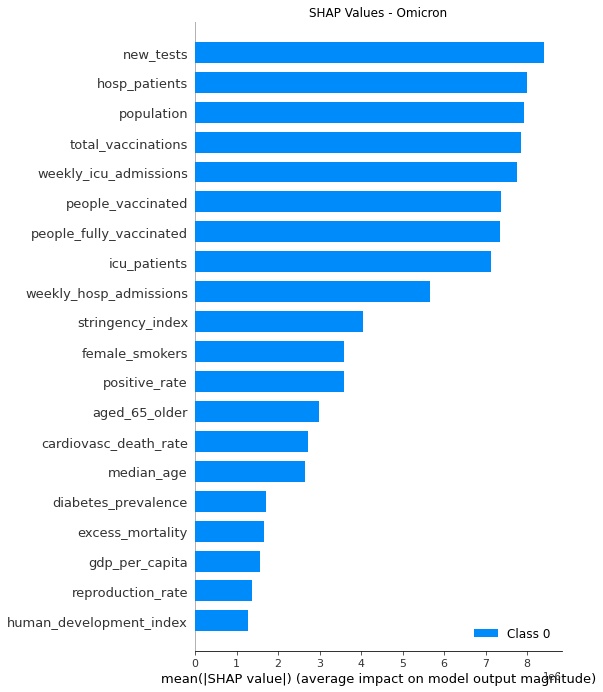

1/1 [==============================] - 0s 26ms/step
Results with Transfer Learning:
   Variant           MAE
0    Alpha  8525697.3726
1     Beta  1370835.9250
2    Gamma  3993712.4125
3    Delta  1627684.2000
4  Omicron 17632318.8000


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import shap
import tensorflow as tf
# Set a fixed random state
random_state = 42


# Assuming df_final is your DataFrame

# Define the variants
variants = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron']

# Initialize empty tables to store results
results_transfer_learning = pd.DataFrame(columns=['Variant', 'MAE'])
results_no_transfer_learning = pd.DataFrame(columns=['Variant', 'MAE'])

# Define EarlyStopping callback with fixed random state
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Iterate through each variant
for i in range(0, len(variants)):
    current_variant = variants[i]
    previous_variant = variants[i-1]

    # Filter the dataset for the current variant
    df_variant = df_final[df_final['variant'] == current_variant]

    # Split the dataset into train and test sets with fixed random state
    train_data, test_data = train_test_split(df_variant, test_size=0.15, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_data.drop(['variant', 'country', 'number_detections_variant'], axis=1))
    y_train = train_data['number_detections_variant']

    X_test = scaler.transform(test_data.drop(['variant', 'country', 'number_detections_variant'], axis=1))
    y_test = test_data['number_detections_variant']

    # Load the previous model if transfer learning is applicable
    if i > 1:
        previous_model = keras.models.clone_model(model)
        previous_model.set_weights(model.get_weights())

    # Define and compile the model
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.8),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.8),  
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.8),  
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1)
    ])
    custom_optimizer = optimizers.Adam(learning_rate=0.007)
    model.compile(optimizer=custom_optimizer, loss='mean_absolute_error')

    # Train the model with EarlyStopping callback
    history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, callbacks=[early_stopping], verbose=0)

    # Transfer weights from the previous model
    if i > 1:
        model.layers[0].set_weights(previous_model.layers[0].get_weights())
        model.layers[1].set_weights(previous_model.layers[1].get_weights())

    # Train the model with EarlyStopping callback
    history_transfer_learning = model.fit(X_train, y_train, epochs=300, validation_split=0.2, callbacks=[early_stopping], verbose=0)

    # Plot train and validation loss
    plt.plot(history_transfer_learning.history['loss'], label='Train Loss')
    plt.plot(history_transfer_learning.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Training Loss - {current_variant}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Explain the model using SHAP values
    # Check if model is compatible with SHAP
    assert isinstance(model, keras.models.Sequential), "Model should be a Keras Sequential model for SHAP compatibility."

    # Check if input shape matches
    assert model.input_shape[1] == X_train.shape[1], "Input shape of the model does not match the shape of the training data."

    # Explain the model using SHAP values (using KernelExplainer)
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_train, nsamples=100)

    # Create a summary plot for each model
    shap.summary_plot(shap_values, X_train, feature_names=train_data.drop(['variant', 'country', 'number_detections_variant'], axis=1).columns, plot_type='bar', show=False)
    plt.title(f'SHAP Values - {current_variant}')
    plt.savefig(f'shap_plot_{current_variant}.png', dpi=300)  # Save the plot with 300 DPI
    plt.show()

    y_pred = model.predict(X_test)

    # Calculate MAE with transfer learning
    mae_transfer_learning = mean_absolute_error(y_test, y_pred)

    # Add results to the table
    results_transfer_learning = results_transfer_learning.append({
        'Variant': current_variant,
        'MAE': mae_transfer_learning
    }, ignore_index=True)

  
# Display the results
print("Results with Transfer Learning:")
print(results_transfer_learning)




In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import shap

# Set a fixed random state
random_state = 42

# Assuming df_final is your DataFrame

# Define the variants
variants = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron']

# Initialize empty tables to store results
results_transfer_learning = pd.DataFrame(columns=['Variant', 'MAE'])


# Define EarlyStopping callback with fixed random state
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Iterate through each variant
for i in range(0, len(variants)):
    current_variant = variants[i]
    previous_variant = variants[i-1]

    # Filter the dataset for the current variant
    df_variant = df_final[df_final['variant'] == current_variant]

    # Split the dataset into train and test sets with fixed random state
    train_data, test_data = train_test_split(df_variant, test_size=0.15, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_data.drop(['variant', 'country', 'number_detections_variant'], axis=1))
    y_train = train_data['number_detections_variant']

    X_test = scaler.transform(test_data.drop(['variant', 'country', 'number_detections_variant'], axis=1))
    y_test = test_data['number_detections_variant']

    # Define and compile the model
    # Define and compile the model
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.8),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.8),  
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.8),  
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1)
    ])
    custom_optimizer = optimizers.Adam(learning_rate=0.007)
    model.compile(optimizer=custom_optimizer, loss='mean_absolute_error')

    # Train the model with EarlyStopping callback
    model.fit(X_train, y_train, epochs=300, validation_split=0.2, callbacks=[early_stopping], verbose=0)

    y_pred = model.predict(X_test)

    # Calculate MAE with transfer learning
    mae_transfer_learning = mean_absolute_error(y_test, y_pred)

    # Add results to the table
    results_transfer_learning = results_transfer_learning.append({
        'Variant': current_variant,
        'MAE': mae_transfer_learning
    }, ignore_index=True)

  
# Display the results
print("Results without Transfer Learning:")
print(results_transfer_learning)




1/1 [==============================] - 0s 78ms/step
Results without Transfer Learning:
   Variant           MAE
0    Alpha  2913768.5750
1     Beta  2895498.9000
2    Gamma  4661568.1750
3    Delta  3871902.2250
4  Omicron 31133588.6000
